# Predicting College Admissions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
collegeData = pd.read_csv("Admission_Predict.csv")
trimColNames = [name.strip() for name in collegeData.columns]
collegeData.columns = trimColNames

collegeData.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Breakdown of Attributes

# Basic Cleanup

In [3]:
collegeData = collegeData.drop("Serial No.", axis = 1)

collegeData["Research"].dtype

dtype('int64')

In [4]:
collegeData["Research"] = collegeData["Research"].astype('category')

# Analyzing the Attributes

<AxesSubplot:>

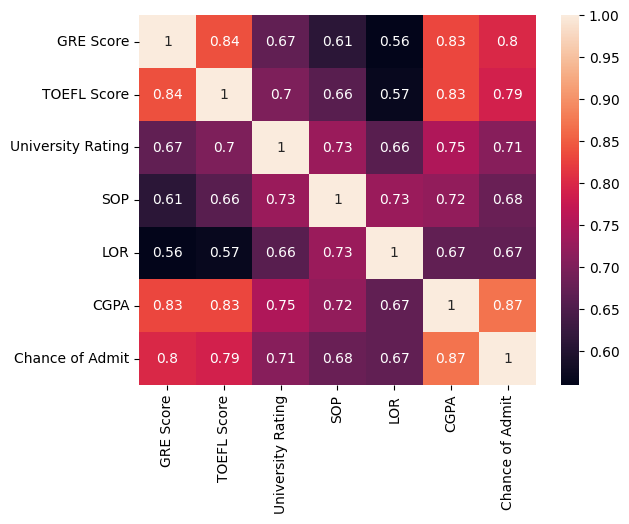

In [5]:
correlation_matrix = collegeData.iloc[:,:].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

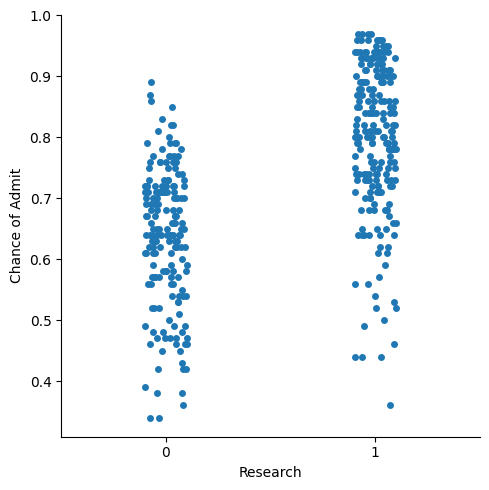

In [6]:


sns.catplot(data = collegeData, x = "Research", y = "Chance of Admit")



In [7]:


X = collegeData.iloc[:,0:7]
y = collegeData.iloc[:,7]



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1005)

# 
Model Breakdown

In [9]:
rf = RandomForestRegressor(n_estimators=250,
                           max_features=(2/7), 
                           min_samples_split=5, 
                           n_jobs=2, 
                           random_state=1005)

In [10]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.2857142857142857, min_samples_split=5,
                      n_estimators=250, n_jobs=2, random_state=1005)

# Model Evaluation Metrics

In [11]:
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

train_mse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_mse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = rf.score(X_train, y_train)
test_r2 = rf.score(X_test, y_test)

print("Train MSE ::", train_mse)
print("Test MSE ::", test_mse)
print("Train R^2 ::", train_r2)
print("Test R^2 ::", test_r2)

Train MSE :: 0.03633127453691611
Test MSE :: 0.07074310150092694
Train R^2 :: 0.9290870140268133
Test R^2 :: 0.813942818798191


# Feature Importance

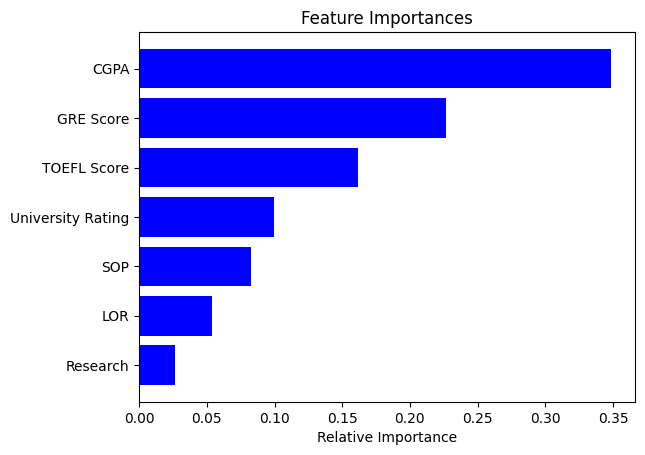

In [12]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Predicting on a Custom Example

In [13]:
newPerson = [[330, 110, 4, 4.5, 4.5, 9.5, 0]]

In [14]:
pred = rf.predict(newPerson)
pred[0]

C:\Users\Sanjay Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.8817428484848481